# <center>**RELATION ENTRE VARIABLES QUALITATIVES : TABLEAU DE CONTINGENCE**


In [1]:
# Code optionnel

from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Charger la nouvelle dataset nettoyée
df = pd.read_csv(r"C:\Users\TOSHIBA\Documents\analyse_project\titanic\titanic_clean.csv")

# Afficher les premières lignes pour vérifier
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Non-survécu,3ème classe,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survécu,1ère classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survécu,3ème classe,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survécu,1ère classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,Non-survécu,3ème classe,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## Chargement du fichier de données nettoyé

Le fichier `titanic_clean.csv` a été généré suite au prétraitement des données initiales.  
Dans ce fichier :
- Les variables **Survived** et **Pclass** ont été transformées en labels textuels compréhensibles,
- Les valeurs manquantes dans **Age** ont été remplacées par la moyenne,
- Les valeurs manquantes dans **Embarked** ont été remplacées par la modalité la plus fréquente,
- La colonne **Cabin**, contenant trop de valeurs manquantes, a été supprimée.

Ce fichier servira de base pour toutes les analyses suivantes.


# <font color=red> Tableau de contingence

In [2]:
# Tableau de contingence entre 'Pclass' et 'Survived'
pd.crosstab(df['Pclass'], df['Survived'])

Survived,Non-survécu,Survécu
Pclass,,
1ère classe,80,136
2ème classe,97,87
3ème classe,372,119


Les passagers de 1ère classe ont eu le taux de survie le plus élevé (63%), contre seulement 24% en 3ème classe, révélant une forte inégalité sociale. 

La 2ème classe (47%) se situe entre les deux, avec légèrement plus de décès que de survivants. Ces écarts s'expliquent par l’accès prioritaire aux 

canots pour les classes supérieures et leur localisation plus proche des ponts d’évacuation. La survie dépendait donc fortement de la classe sociale.

In [4]:
# Sexe vs Survie, normalisé par colonne
pd.crosstab(df['Sex'], df['Survived']).apply(lambda z: z / z.sum(), axis=0)


Survived,Non-survécu,Survécu
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


Les femmes ont bénéficié d'un taux de survie bien supérieur (68%) contre seulement 32% pour les hommes, reflétant la politique "femmes et enfants 

d'abord". À l'inverse, 85% des décès concernaient des hommes, montrant leur sacrifice prioritaire lors du naufrage. Cette disparité souligne le rôle 

crucial du genre dans les chances de survie.

In [5]:
# Tableau de contingence entre le genre et la classe selon la survie, normalisé par ligne
pd.crosstab([df['Sex'], df['Pclass']], df['Survived']).apply(lambda x: x / x.sum(), axis=1)


Survived            Non-survécu   Survécu
Sex    Pclass                            
female 1ère classe     0.031915  0.968085
       2ème classe     0.078947  0.921053
       3ème classe     0.500000  0.500000
male   1ère classe     0.631148  0.368852
       2ème classe     0.842593  0.157407
       3ème classe     0.864553  0.135447

1- Femmes

- 1ère classe : Survie écrasante (97%)

- 2ème classe : Taux excellent (92%)

- 3ème classe : Seulement 50% de survie → L'effet protecteur du genre disparaît en classe inférieure

  

2- Hommes

- 1ère classe : Meilleure survie masculine (37%, contre <16% ailleurs)

- Classes 2-3 : Taux de survie catastrophiques (≤16%)

Privilège minime de la 1ère classe pour les hommes


3- Révélations clés :

- L'avantage féminin était absolu en classes supérieures, mais s'effondrait en 3ème classe

- Les hommes de 1ère classe survivent 2× mieux que ceux des autres classes, mais restent désavantagés vs les femmes

- Inégalité extrême : Une femme de 3ème classe avait autant de chances de survie qu'un homme de 1ère classe


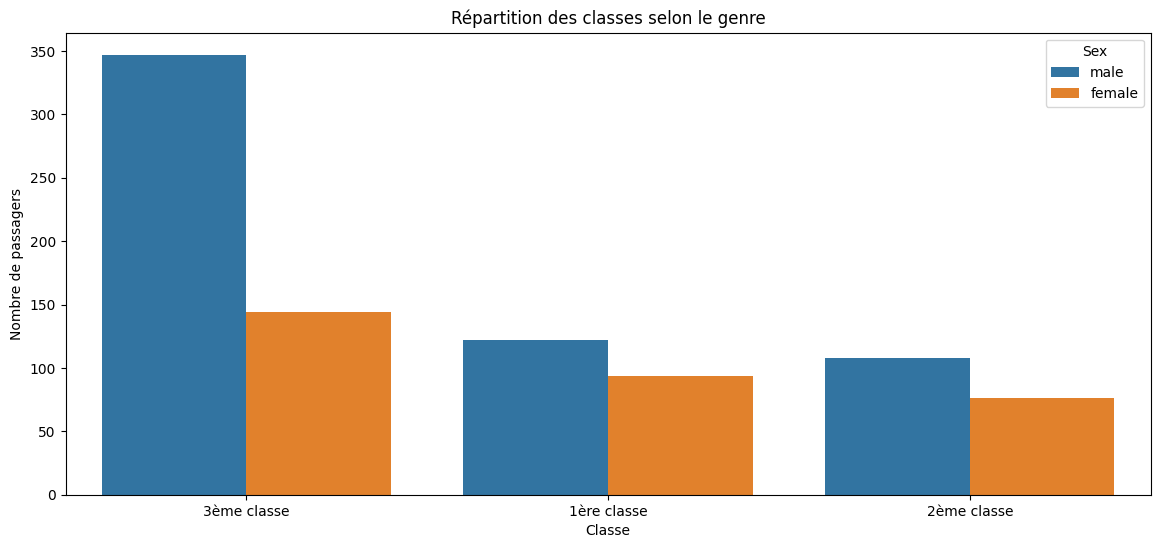

In [6]:
# Diagramme à barres montrant la classe des passagers selon le genre
plt.figure(figsize=(14, 6))
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title("Répartition des classes selon le genre")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()


Ce diagramme à barres montre la **répartition des passagers du Titanic par classe (Pclass) et par genre (Sex)**. Voici les observations clés :  

#### **1. Disparités entre hommes et femmes**  
- **3ème classe** :  
  - **Nombre d'hommes** largement supérieur à celui des femmes.  
  - Réflète la composition typique des migrants (travailleurs célibataires ou familles pauvres).  
- **1ère et 2ème classes** :  
  - Proportion plus équilibrée, mais légèrement plus d'hommes (voyageurs d'affaires, familles aisées).  

#### **2. Structure sociale du Titanic**  
- **3ème classe = la plus peuplée** (majorité des passagers), surtout des hommes.  
- **1ère classe = minoritaire**, mais avec une présence significative de femmes (épouses, familles fortunées).  
- **2ème classe** : Position intermédiaire, mélange de voyageurs moyens.  

#### **3. Implications pour la survie (lien avec les analyses précédentes)**  
- Le **déséquilibre hommes/femmes en 3ème classe** explique en partie leur faible taux de survie :  
  - Beaucoup d'hommes seuls, moins prioritaires pour les canots.  
- En **1ère classe**, la présence de femmes et familles a favorisé leur évacuation prioritaire.  

#### **Conclusion**  
Cette répartition illustre **les inégalités sociales et démographiques** à bord :  
- **Classe** déterminait l’accès aux ressources (canots).  
- **Genre** jouait un rôle crucial, mais son impact variait selon la classe.  
- La **3ème classe, majoritairement masculine**, a payé le plus lourd tribut.  